# Iris classificatin using Keras

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

In [2]:
iris = datasets.load_iris()

print(iris['data'].shape)
print(iris['target'].shape)
print(iris['feature_names'])

(150, 4)
(150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['target'])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


/usr/local/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


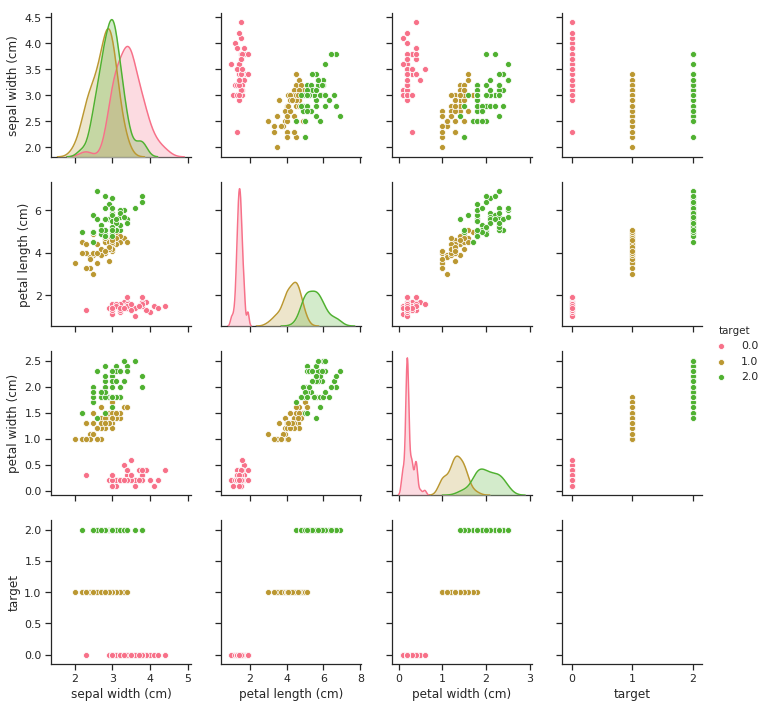

In [4]:
# plot relations
sns.set(style="ticks")
sns.set_palette("husl")
sns.pairplot(df.iloc[:,1:6], hue="target")

In [5]:
#Splitting the data into training and test test
X = df.iloc[:,0:4] # features
y = df.iloc[:,4].astype(int) # label

In [6]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values
Y[0:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=0) 

## Create our classification model

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()

model.add(Dense(10, input_shape=(4,), activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(6, activation='tanh'))
model.add(Dense(3, activation='softmax'))

Using TensorFlow backend.
W0927 02:30:30.487836 140714853110784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0927 02:30:30.509447 140714853110784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0927 02:30:30.512941 140714853110784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.metrics_names)

model.summary()

W0927 02:30:30.607736 140714853110784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0927 02:30:30.644646 140714853110784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



['loss', 'acc']
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 21        
Total params: 213
Trainable params: 213
Non-trainable params: 0
_________________________________________________________________


### Fitting the model and predicting

In [12]:
batch_size = 32
epochs = 120

history = model.fit(X_train,
                    Y_train,
                    validation_data=(X_test, Y_test),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

W0927 02:31:40.810191 140714853110784 deprecation.py:323] From /usr/local/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0927 02:31:40.892325 140714853110784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 120 samples, validate on 30 samples
Epoch 1/120
120/120 [==============================] - 0s 3ms/step - loss: 1.1283 - acc: 0.3667 - val_loss: 1.2122 - val_acc: 0.2000
Epoch 2/120
120/120 [==============================] - 0s 104us/step - loss: 1.1159 - acc: 0.3667 - val_loss: 1.1918 - val_acc: 0.2000
Epoch 3/120
120/120 [==============================] - 0s 101us/step - loss: 1.1056 - acc: 0.3667 - val_loss: 1.1729 - val_acc: 0.2000
Epoch 4/120
120/120 [==============================] - 0s 84us/step - loss: 1.0989 - acc: 0.3667 - val_loss: 1.1568 - val_acc: 0.2000
Epoch 5/120
120/120 [==============================] - 0s 80us/step - loss: 1.0893 - acc: 0.3667 - val_loss: 1.1453 - val_acc: 0.2000
Epoch 6/120
120/120 [==============================] - 0s 323us/step - loss: 1.0866 - acc: 0.3667 - val_loss: 1.1346 - val_acc: 0.2000
Epoch 7/120
120/120 [==============================] - 0s 105us/step - loss: 1.0819 - acc: 0.3667 - val_loss: 1.1264 - val_acc: 0.2000
Epoch 8/120
12

## Evaluate the model

And let's see how the model performs. Two values will be returned:

- Loss (a number which represents our error, lower values are better)
- Accuracy.

In [13]:
score = model.evaluate(X_test,
                       Y_test,
                       batch_size=batch_size,
                       verbose=1)

print('Test loss:', round(score[0], 3))
print('Test accuracy:', round(score[1], 3))

30/30 [==============================] - 0s 34us/step
Test loss: 0.135
Test accuracy: 1.0


In [14]:
Y_pred = model.predict(X_test)

Y_test_class = np.argmax(Y_test, axis=1)
Y_pred_class = np.argmax(Y_pred, axis=1)

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test_class, Y_pred_class))
print(confusion_matrix(Y_test_class, Y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


## Create a graph of accuracy and loss over time

`model.fit()` returns a `History` object that contains a dictionary with everything that happened during training:

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

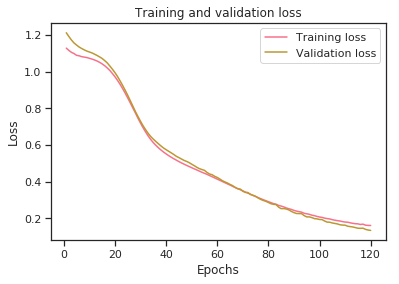

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

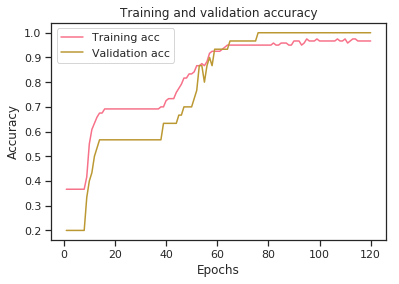

In [17]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()